# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 30 minutes**. For this time interval, using the values of the **5 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train an LSTM network.**



Features:

* Datetime: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

PowerConsumption

## Dataset links:
 * [DS1](https://drive.google.com/file/d/1k5Ee9kla-0s8iuEASsSY2u5hl6YstzlN/view?usp=sharing)
 * [DS2](https://drive.google.com/file/d/1--Kep6SOWuyQ2FTlBDdwWHj-65bOl1kc/view?usp=sharing)

## Read the datasets

In [ ]:
!pip install keras
# Data manipulation and preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Keras imports for building neural networks
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Visualization
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('/content/sample_data/power_consumption_g1.csv')
df2 = pd.read_csv('/content/sample_data/power_consumption_g1_feat.csv')

## Merge the datasets (and pre-processing if needed)

In [ ]:
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1 = df1.set_index('Datetime')
df1 = df1.sort_index()


In [ ]:
df1.head(20)

,PowerConsumption
Datetime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
2017-01-01 00:50:00,26624.81013
2017-01-01 01:00:00,25998.98734
2017-01-01 01:10:00,25446.07595
2017-01-01 01:20:00,24777.72152


In [ ]:
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df2 = df2.set_index('Datetime')
df2 = df2.sort_index()


In [ ]:
df2.head(50)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
2017-01-01 00:50:00,NaN,76.9,0.081,0.059,0.108
2017-01-01 01:00:00,5.641,77.7,0.080,0.048,0.096
2017-01-01 01:10:00,5.496,NaN,0.085,0.055,0.093
2017-01-01 01:20:00,5.678,78.1,0.081,0.066,0.141


In [ ]:
df1.isnull().sum()


,0
PowerConsumption,0


In [ ]:
df2.isnull().sum()


,0
Temperature,559
Humidity,499
WindSpeed,529
GeneralDiffuseFlows,524
DiffuseFlows,505


In [ ]:
df2= df2.fillna(df2.median())
df2.median()

,0
Temperature,18.800
Humidity,69.870
WindSpeed,0.086
GeneralDiffuseFlows,5.036
DiffuseFlows,4.311


In [ ]:
df2.head(20)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,
2017-01-01 00:00:00,6.559,73.80,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.50,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.50,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.00,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.70,0.081,0.048,0.085
2017-01-01 00:50:00,18.800,76.90,0.081,0.059,0.108
2017-01-01 01:00:00,5.641,77.70,0.080,0.048,0.096
2017-01-01 01:10:00,5.496,69.87,0.085,0.055,0.093
2017-01-01 01:20:00,5.678,78.10,0.081,0.066,0.141


In [ ]:
df = df1.merge(df2, how='left', right_index=True, left_index=True)

In [ ]:
df.head(20)

,PowerConsumption,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,,
2017-01-01 00:00:00,34055.69620,6.559,73.80,0.083,0.051,0.119
2017-01-01 00:10:00,29814.68354,6.414,74.50,0.083,0.070,0.085
2017-01-01 00:20:00,29128.10127,6.313,74.50,0.080,0.062,0.100
2017-01-01 00:30:00,28228.86076,6.121,75.00,0.083,0.091,0.096
2017-01-01 00:40:00,27335.69620,5.921,75.70,0.081,0.048,0.085
2017-01-01 00:50:00,26624.81013,18.800,76.90,0.081,0.059,0.108
2017-01-01 01:00:00,25998.98734,5.641,77.70,0.080,0.048,0.096
2017-01-01 01:10:00,25446.07595,5.496,69.87,0.085,0.055,0.093
2017-01-01 01:20:00,24777.72152,5.678,78.10,0.081,0.066,0.141


## Group the datasets into time intervals of 30 mintues

In [ ]:
df = df.groupby(pd.Grouper(freq="30min")).median()

In [ ]:
df.head(20)

,PowerConsumption,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,,
2017-01-01 00:00:00,29814.68354,6.414,74.5,0.083,0.062,0.100
2017-01-01 00:30:00,27335.69620,6.121,75.7,0.081,0.059,0.096
2017-01-01 01:00:00,25446.07595,5.641,77.7,0.081,0.055,0.096
2017-01-01 01:30:00,23896.70886,5.491,77.3,0.082,0.059,0.111
2017-01-01 02:00:00,22329.11392,4.975,78.8,0.083,0.070,0.134
2017-01-01 02:30:00,21685.06329,5.020,79.1,0.082,0.062,0.134
2017-01-01 03:00:00,20998.48101,5.081,77.7,0.083,0.062,0.130
2017-01-01 03:30:00,20597.46835,4.896,76.6,0.083,0.059,0.137
2017-01-01 04:00:00,20524.55696,4.901,74.4,0.083,0.062,0.122


## Create lags

In [ ]:
columns = df.columns

In [ ]:
lag = 5

In [ ]:
for i in range(1, lag+1):
  for col in columns:
    df[f'{col}_prev_{i}'] = df[col].shift(i)

In [ ]:
df

,PowerConsumption,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_prev_1,Temperature_prev_1,Humidity_prev_1,WindSpeed_prev_1,...,Humidity_prev_4,WindSpeed_prev_4,GeneralDiffuseFlows_prev_4,DiffuseFlows_prev_4,PowerConsumption_prev_5,Temperature_prev_5,Humidity_prev_5,WindSpeed_prev_5,GeneralDiffuseFlows_prev_5,DiffuseFlows_prev_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,29814.68354,6.414,74.5,0.083,0.062,0.100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,27335.69620,6.121,75.7,0.081,0.059,0.096,29814.68354,6.414,74.50,0.083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,25446.07595,5.641,77.7,0.081,0.055,0.096,27335.69620,6.121,75.70,0.081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:30:00,23896.70886,5.491,77.3,0.082,0.059,0.111,25446.07595,5.641,77.70,0.081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,22329.11392,4.975,78.8,0.083,0.070,0.134,23896.70886,5.491,77.30,0.082,...,74.50,0.083,0.062,0.100,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,34591.63498,7.950,70.2,0.082,0.062,0.085,35832.69962,7.890,69.83,0.082,...,63.12,0.075,0.051,0.093,37694.29658,9.71,62.22,0.074,0.059,0.111
2017-12-30 22:00:00,34737.64259,7.650,70.1,0.081,0.062,0.119,34591.63498,7.950,70.20,0.082,...,63.42,0.075,0.048,0.130,37280.60837,9.18,63.12,0.075,0.051,0.093
2017-12-30 22:30:00,33387.07224,7.390,71.0,0.084,0.062,0.104,34737.64259,7.650,70.10,0.081,...,64.52,0.085,0.070,0.089,37171.10266,8.90,63.42,0.075,0.048,0.130


In [ ]:
df=df.dropna()

In [ ]:
df.head(20)

,PowerConsumption,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_prev_1,Temperature_prev_1,Humidity_prev_1,WindSpeed_prev_1,...,Humidity_prev_4,WindSpeed_prev_4,GeneralDiffuseFlows_prev_4,DiffuseFlows_prev_4,PowerConsumption_prev_5,Temperature_prev_5,Humidity_prev_5,WindSpeed_prev_5,GeneralDiffuseFlows_prev_5,DiffuseFlows_prev_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:30:00,21685.06329,5.020,79.10,0.082,0.062,0.134,22329.11392,4.975,78.80,0.083,...,75.7,0.081,0.059,0.096,29814.68354,6.414,74.5,0.083,0.062,0.100
2017-01-01 03:00:00,20998.48101,5.081,77.70,0.083,0.062,0.130,21685.06329,5.020,79.10,0.082,...,77.7,0.081,0.055,0.096,27335.69620,6.121,75.7,0.081,0.059,0.096
2017-01-01 03:30:00,20597.46835,4.896,76.60,0.083,0.059,0.137,20998.48101,5.081,77.70,0.083,...,77.3,0.082,0.059,0.111,25446.07595,5.641,77.7,0.081,0.055,0.096
2017-01-01 04:00:00,20524.55696,4.901,74.40,0.083,0.062,0.122,20597.46835,4.896,76.60,0.083,...,78.8,0.083,0.070,0.134,23896.70886,5.491,77.3,0.082,0.059,0.111
2017-01-01 04:30:00,20494.17722,5.179,74.00,0.081,0.062,0.137,20524.55696,4.901,74.40,0.083,...,79.1,0.082,0.062,0.134,22329.11392,4.975,78.8,0.083,0.070,0.134
2017-01-01 05:00:00,20621.77215,4.934,74.00,0.082,0.055,0.134,20494.17722,5.179,74.00,0.081,...,77.7,0.083,0.062,0.130,21685.06329,5.020,79.1,0.082,0.062,0.134
2017-01-01 05:30:00,20858.73418,4.382,76.90,0.081,0.073,0.104,20621.77215,4.934,74.00,0.082,...,76.6,0.083,0.059,0.137,20998.48101,5.081,77.7,0.083,0.062,0.130
2017-01-01 06:00:00,21928.10127,4.735,75.60,0.081,0.062,0.126,20858.73418,4.382,76.90,0.081,...,74.4,0.083,0.062,0.122,20597.46835,4.896,76.6,0.083,0.059,0.137
2017-01-01 06:30:00,21466.32911,4.408,76.70,0.083,0.037,0.119,21928.10127,4.735,75.60,0.081,...,74.0,0.081,0.062,0.137,20524.55696,4.901,74.4,0.083,0.062,0.122


In [ ]:
features = df.columns.drop(['Temperature', 'Humidity','WindSpeed', 'GeneralDiffuseFlows','DiffuseFlows', 'PowerConsumption'])

In [ ]:
features


Index(['PowerConsumption_prev_1', 'Temperature_prev_1', 'Humidity_prev_1',
       'WindSpeed_prev_1', 'GeneralDiffuseFlows_prev_1', 'DiffuseFlows_prev_1',
       'PowerConsumption_prev_2', 'Temperature_prev_2', 'Humidity_prev_2',
       'WindSpeed_prev_2', 'GeneralDiffuseFlows_prev_2', 'DiffuseFlows_prev_2',
       'PowerConsumption_prev_3', 'Temperature_prev_3', 'Humidity_prev_3',
       'WindSpeed_prev_3', 'GeneralDiffuseFlows_prev_3', 'DiffuseFlows_prev_3',
       'PowerConsumption_prev_4', 'Temperature_prev_4', 'Humidity_prev_4',
       'WindSpeed_prev_4', 'GeneralDiffuseFlows_prev_4', 'DiffuseFlows_prev_4',
       'PowerConsumption_prev_5', 'Temperature_prev_5', 'Humidity_prev_5',
       'WindSpeed_prev_5', 'GeneralDiffuseFlows_prev_5',
       'DiffuseFlows_prev_5'],
      dtype='object')

In [ ]:
X, Y = df[features], df['PowerConsumption']

In [ ]:
X

,PowerConsumption_prev_1,Temperature_prev_1,Humidity_prev_1,WindSpeed_prev_1,GeneralDiffuseFlows_prev_1,DiffuseFlows_prev_1,PowerConsumption_prev_2,Temperature_prev_2,Humidity_prev_2,WindSpeed_prev_2,...,Humidity_prev_4,WindSpeed_prev_4,GeneralDiffuseFlows_prev_4,DiffuseFlows_prev_4,PowerConsumption_prev_5,Temperature_prev_5,Humidity_prev_5,WindSpeed_prev_5,GeneralDiffuseFlows_prev_5,DiffuseFlows_prev_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:30:00,22329.11392,4.975,78.80,0.083,0.070,0.134,23896.70886,5.491,77.30,0.082,...,75.70,0.081,0.059,0.096,29814.68354,6.414,74.50,0.083,0.062,0.100
2017-01-01 03:00:00,21685.06329,5.020,79.10,0.082,0.062,0.134,22329.11392,4.975,78.80,0.083,...,77.70,0.081,0.055,0.096,27335.69620,6.121,75.70,0.081,0.059,0.096
2017-01-01 03:30:00,20998.48101,5.081,77.70,0.083,0.062,0.130,21685.06329,5.020,79.10,0.082,...,77.30,0.082,0.059,0.111,25446.07595,5.641,77.70,0.081,0.055,0.096
2017-01-01 04:00:00,20597.46835,4.896,76.60,0.083,0.059,0.137,20998.48101,5.081,77.70,0.083,...,78.80,0.083,0.070,0.134,23896.70886,5.491,77.30,0.082,0.059,0.111
2017-01-01 04:30:00,20524.55696,4.901,74.40,0.083,0.062,0.122,20597.46835,4.896,76.60,0.083,...,79.10,0.082,0.062,0.134,22329.11392,4.975,78.80,0.083,0.070,0.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,35832.69962,7.890,69.83,0.082,0.081,0.115,36879.08745,9.290,64.52,0.085,...,63.12,0.075,0.051,0.093,37694.29658,9.710,62.22,0.074,0.059,0.111
2017-12-30 22:00:00,34591.63498,7.950,70.20,0.082,0.062,0.085,35832.69962,7.890,69.83,0.082,...,63.42,0.075,0.048,0.130,37280.60837,9.180,63.12,0.075,0.051,0.093
2017-12-30 22:30:00,34737.64259,7.650,70.10,0.081,0.062,0.119,34591.63498,7.950,70.20,0.082,...,64.52,0.085,0.070,0.089,37171.10266,8.900,63.42,0.075,0.048,0.130


In [ ]:
Y

,PowerConsumption
Datetime,
2017-01-01 02:30:00,21685.06329
2017-01-01 03:00:00,20998.48101
2017-01-01 03:30:00,20597.46835
2017-01-01 04:00:00,20524.55696
2017-01-01 04:30:00,20494.17722
...,...
2017-12-30 21:30:00,34591.63498
2017-12-30 22:00:00,34737.64259
2017-12-30 22:30:00,33387.07224


# Split the dataset into 80% training and 20% testing datasets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Create the model, pre-process the data and make it suitable for training

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], lag, X_train.shape[1] // lag)
X_test = X_test.reshape(X_test.shape[0], lag, X_test.shape[1] // lag)

In [ ]:
model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

## Train the model, use 20% of the training dataset for validation
Train with 10 epochs (due to time limit)

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=16, epochs=10,  shuffle=False)

Epoch 1/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0312 - mean_absolute_error: 0.1180 - mean_squared_error: 0.0312 - val_loss: 0.0046 - val_mean_absolute_error: 0.0482 - val_mean_squared_error: 0.0046
Epoch 2/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0037 - mean_absolute_error: 0.0474 - mean_squared_error: 0.0037 - val_loss: 0.0033 - val_mean_absolute_error: 0.0411 - val_mean_squared_error: 0.0033
Epoch 3/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0028 - mean_absolute_error: 0.0397 - mean_squared_error: 0.0028 - val_loss: 0.0030 - val_mean_absolute_error: 0.0403 - val_mean_squared_error: 0.0030
Epoch 4/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0358 - mean_squared_error: 0.0024 - val_loss: 0.0024 - val_mean_absolute_error: 0.0362 - val_mean_squared_error: 0.0024
Epoch 5/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0019 - mean_absolute_error: 0.0321 - mean_squared_error: 0.0019 - val_loss: 0.0019 - v

## Plot the loss function on the training and validation dataset

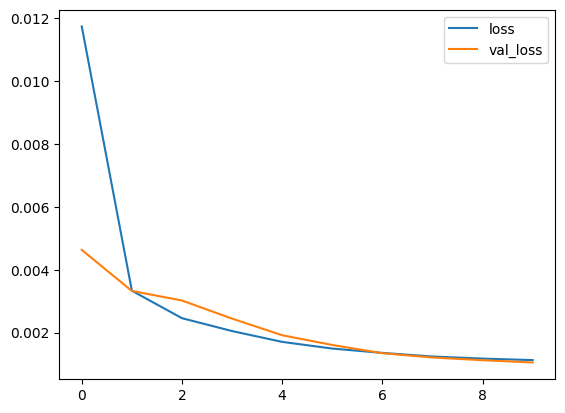

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Calculate the adequate metrics

In [ ]:
preds = model.predict(X_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
preds = scaler.inverse_transform(preds)

In [ ]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(1812227.0085195857, 1027.8697300609974, 0.9430403068695454)

## Visualize the targets against the predictions

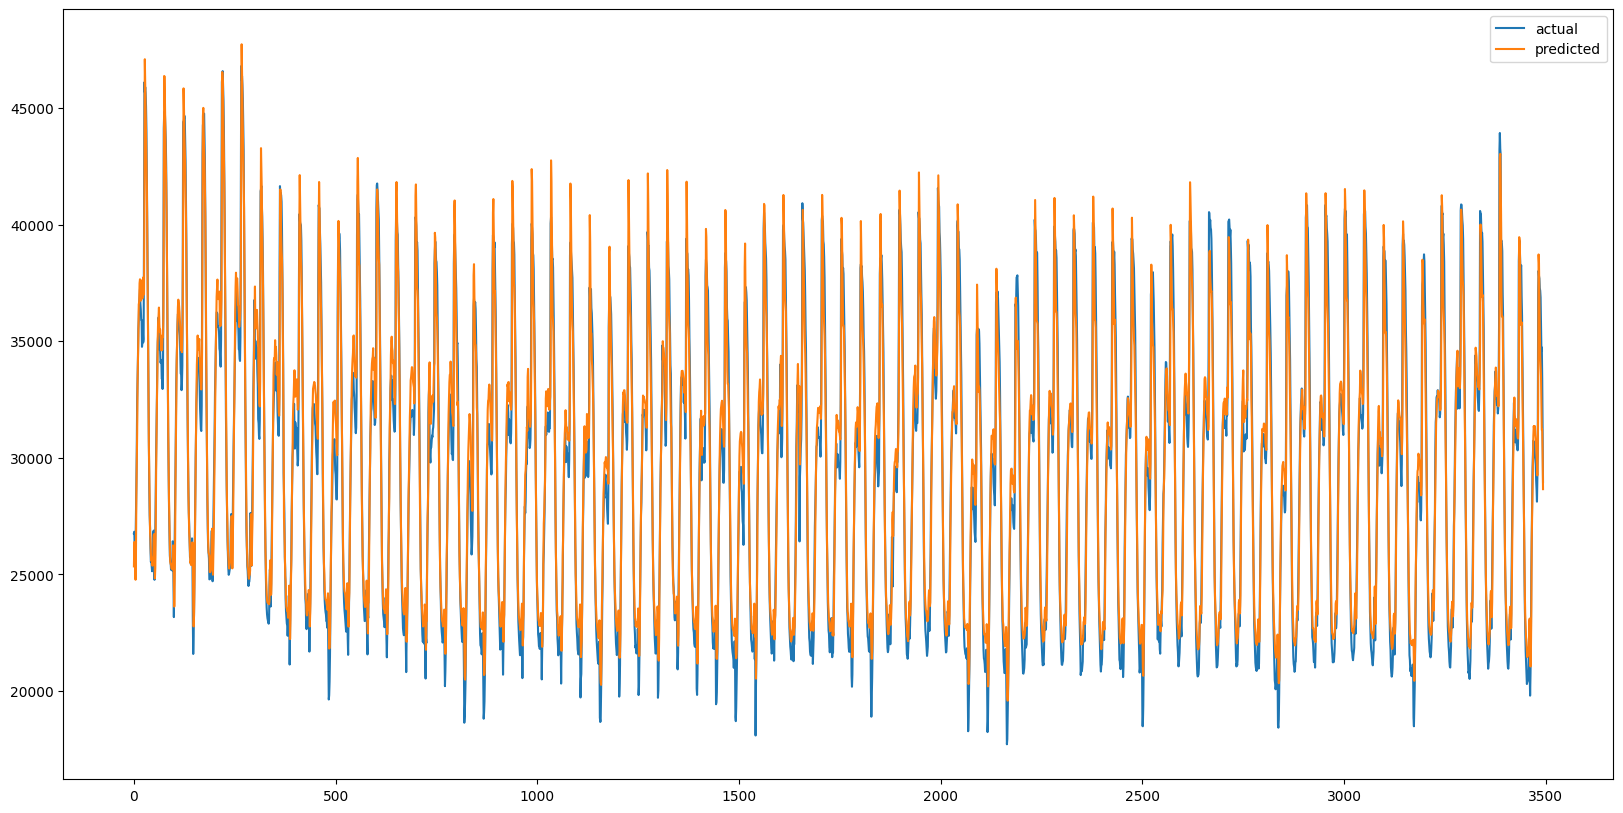

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()